# 1d plotting

## Standardized input 

## Pandas and xarray integration

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import proplot as plot
# DataArray
state = np.random.RandomState(51423)
data = np.sin(np.linspace(0, 2*np.pi, 20))[:,None] + state.rand(20,8).cumsum(axis=1)
da = xr.DataArray(data, dims=('x', 'cat'), coords={
    'x':xr.DataArray(np.linspace(0,1,20), dims=('x',), attrs={'long_name':'distance', 'units':'km'}),
    'cat':xr.DataArray(np.arange(0,80,10), dims=('cat',), attrs={'long_name':'parameter', 'units':'K'})
    }, name='position series')
# DataFrame
plot.rc.reset()
ts = pd.date_range('1/1/2000', periods=20)
data = (np.cos(np.linspace(0, 2*np.pi, 20))**4)[:,None] + state.rand(20,5)**2
df = pd.DataFrame(data, index=ts, columns=['foo','bar','baz','zap','baf'])
df.name = 'time series'
df.index.name = 'time (s)'
df.columns.name = 'columns'

In [ ]:
# Figure
f, axs = plot.subplots(ncols=2, axwidth=2.2, share=0)
axs.format(suptitle='Automatic subplot formatting')
# Plot DataArray
cycle = plot.Cycle(plot.shade('light blue', 0.4), fade=90, space='hpl')
axs[0].plot(da, cycle=cycle, lw=3, colorbar='ul', colorbar_kw={'locator':20})
# Plot Dataframe
cycle = plot.Cycle(plot.shade('jade', 0.4), fade=90, space='hpl')
axs[1].plot(df, cycle=cycle, lw=3, legend='uc')

## On-the-fly property cycles

## Easier error bars

In [ ]:
import proplot as plot
import numpy as np
import pandas as pd
plot.rc['title.loc'] = 'uc'
plot.rc['axes.ymargin'] = plot.rc['axes.xmargin'] = 0.05
state = np.random.RandomState(51423)
data = state.rand(20,8).cumsum(axis=0).cumsum(axis=1)[:,::-1] + 20*state.normal(size=(20,8)) + 30
f, axs = plot.subplots(nrows=3, aspect=1.5, axwidth=3, share=0, hratios=(2,1,1))
axs.format(suptitle='Error bars with various plotting commands')
# Asking add_errorbars to calculate bars
ax = axs[0]
obj = ax.barh(data, color='red orange', means=True)
ax.format(title='Column statistics')
# Showing a standard deviation range instead of percentile range
ax = axs[1]
ax.scatter(data, color='k', marker='x', markersize=50, barcolor='gray5',
           medians=True, barstd=True, barrange=(-1,1), barzorder=0, boxes=False, capsize=2)
# Supplying error bar data manually
ax = axs[2]
boxdata = np.percentile(data, (25,75), axis=0)
bardata = np.percentile(data, (5,95), axis=0)
ax.plot(data.mean(axis=0), boxes=False, marker='o', markersize=5,
        edgecolor='k', color='cerulean', boxdata=boxdata, bardata=bardata)
# Formatting
axs[0].format(ylabel='column number', title='Bar plot', ygrid=False)
axs[1].format(title='Scatter plot')
axs[2].format(title='Line plot')
axs[1:].format(xlabel='column number', xticks=1, xgrid=False)
plot.rc.reset()

## Bar plots

In [ ]:
import proplot as plot
import numpy as np
import pandas as pd
plot.rc.titleloc = 'uc'
plot.rc.margin = 0.05
f, axs = plot.subplots(nrows=2, aspect=2, axwidth=3.5, share=0, hratios=(3,2))
state = np.random.RandomState(51423)
data = state.rand(5,5).cumsum(axis=0).cumsum(axis=1)[:,::-1]
data = pd.DataFrame(data, columns=pd.Index(np.arange(1,6), name='column'), index=pd.Index(['a','b','c','d','e'], name='row idx'))
ax = axs[0]
obj = ax.bar(data, cycle='Reds', colorbar='ul', edgecolor='red9', colorbar_kw={'frameon':False})
ax.format(xlocator=1, xminorlocator=0.5, ytickminor=False, title='Side-by-side', suptitle='Bar plot wrapper demo')
ax = axs[1]
obj = ax.barh(data.iloc[::-1,:], cycle='Blues', legend='ur', edgecolor='blue9', stacked=True)
ax.format(title='Stacked')
axs.format(grid=False)
plot.rc.reset()

## Area plots

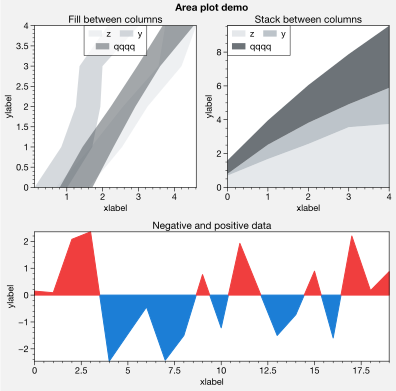

In [1]:
import proplot as plot
import numpy as np
plot.rc.margin = 0
f, axs = plot.subplots(array=[[1,2],[3,3]], hratios=(1,0.8), share=0)
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Area plot demo')
state = np.random.RandomState(51423)
data = state.rand(5,3).cumsum(axis=0)
cycle = ('gray3', 'gray5', 'gray7')
ax = axs[0]
ax.areax(np.arange(5), data, data + state.rand(5)[:,None], cycle=cycle, alpha=0.5,
        legend='uc', legend_kw={'center':True, 'ncols':2, 'labels':['z','y','qqqq']},
        )
ax.format(title='Fill between columns')
ax = axs[1]
ax.area(np.arange(5), data, stacked=True, cycle=cycle, alpha=0.8,
        legend='ul', legend_kw={'center':True, 'ncols':2, 'labels':['z','y','qqqq']},
        )
ax.format(title='Stack between columns')
ax = axs[2]
data = 5*(state.rand(20)-0.5)
ax.area(data, negpos=True, negcolor='blue7', poscolor='red7')
ax.format(title='Negative and positive data', xlabel='xlabel', ylabel='ylabel')
axs.format(grid=False)
plot.rc.reset()

## Box plots and violin plots

In [ ]:
import proplot as plot
import numpy as np
import pandas as pd
N = 500
state = np.random.RandomState(51423)
f, axs = plot.subplots(ncols=2)
data = state.normal(size=(N,5)) + 2*(state.rand(N,5)-0.5)*np.arange(5)
data = pd.DataFrame(data, columns=pd.Index(['a','b','c','d','e'], name='xlabel'))
ax = axs[0]
obj1 = ax.boxplot(data, lw=0.7, marker='x', fillcolor='gray5', medianlw=1, mediancolor='k')#, boxprops={'color':'C0'})#, labels=data.columns)
ax.format(title='Box plots', titleloc='uc')
ax = axs[1]
obj2 = ax.violinplot(data, lw=0.7, fillcolor='gray7', points=500, bw_method=0.3, means=True)
ax.format(title='Violin plots', titleloc='uc')
axs.format(ymargin=0.1, xmargin=0.1, grid=False, suptitle='Boxes and violins demo')

## Parametric plots

In [ ]:
import proplot as plot
import numpy as np
plot.rc.reset()
N = 50
cmap = 'IceFire'
values = np.linspace(-N/2, N/2, N)
f, axs = plot.subplots(share=0, ncols=2, wratios=(2,1), axwidth='6cm', aspect=(2,1))
ax = axs[0]
state = np.random.RandomState(51423)
m = ax.plot((state.rand(N)-0.5).cumsum(), state.rand(N), cmap=cmap, values=values, lw=7, extend='both')
ax.format(xlabel='xlabel', ylabel='ylabel', title='Line with smooth color gradations', titleweight='bold')
ax.format(xlim=(-1,5), ylim=(-0.2,1.2))
ax.colorbar(m, loc='b', label='parametric coordinate', locator=5)
N = 12
ax = axs[1]
values = np.linspace(-N/2, N/2 - 1, N)
radii = np.linspace(1,0.2,N)
angles = np.linspace(0,4*np.pi,N)
x = radii*np.cos(1.4*angles)
y = radii*np.sin(1.4*angles)
m = ax.plot(x, y, values=values, linewidth=15, interp=False, cmap=cmap)
ax.format(xlim=(-1,1), ylim=(-1,1), title='Step gradations', titleweight='bold', xlabel='cosine angle', ylabel='sine angle')
ax.colorbar(m, loc='b', maxn=10, label=f'parametric coordinate')

## Misc enhancements

In [ ]:
import proplot as plot
import numpy as np
import pandas as pd
f, axs = plot.subplots(ncols=2, share=1)
state = np.random.RandomState(51423)
x = (state.rand(20)-0).cumsum()
data = (state.rand(20,4)-0.5).cumsum(axis=0)
data = pd.DataFrame(data, columns=pd.Index(['a','b','c','d'], name='label'))
# Scatter demo
ax = axs[0]
ax.format(title='Extra prop cycle properties', suptitle='Scatter plot demo')
obj = ax.scatter(x, data, legend='ul', cycle='warm', legend_kw={'ncols':2},
                cycle_kw={'marker':['x','o','x','o'], 'markersize':[5,10,20,30]})
ax = axs[1]
ax.format(title='Scatter plot with cmap')
data = (state.rand(2,100) - 0.5)
obj = ax.scatter(*data, color=data.sum(axis=0), size=state.rand(100), smin=3, smax=30,
                 marker='o', cmap='dusk', colorbar='lr', colorbar_kw={'locator':0.5, 'label':'label'})
axs.format(xlabel='xlabel', ylabel='ylabel')